In [49]:
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

In [50]:
from sklearn.metrics import accuracy_score

In [98]:
X1 = np.random.normal(loc=2,scale=0.5, size=(100))
y1 = np.random.normal(loc=2,scale=0.5,size=(100))

X2 = np.random.normal(loc=4,scale=0.5, size=(100))
y2 = np.random.normal(loc=4,scale=0.5,size=(100))

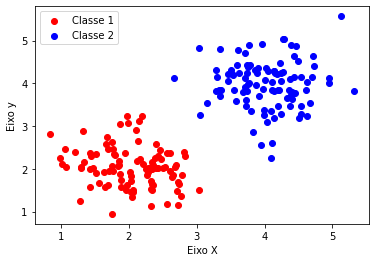

In [99]:
plt.scatter(X1,y1, color='red', label='Classe 1')
plt.scatter(X2,y2, color='blue', label='Classe 2')
plt.xlabel('Eixo X')
plt.ylabel('Eixo y')
plt.legend()

In [100]:
X = np.zeros((200,3))
X[:,0] = np.append(X1,X2)
X[:,1] = np.append(y1,y2)
f = lambda i:1 if i <100 else 2 
classe = [f(i) for i in range(200)]
X[:,2] = classe

In [101]:
X = pd.DataFrame(X)

In [102]:
X.rename(columns={0:'X1',1:'X2',2:'Classe'}, inplace=True)
X

,X1,X2,Classe
0,2.197629,3.243409,1.0
1,1.845987,2.070918,1.0
2,1.654526,1.583036,1.0
3,1.634602,1.935072,1.0
4,2.714994,1.476406,1.0
...,...,...,...
195,3.714006,3.916672,2.0
196,4.052655,4.292886,2.0
197,3.806286,3.354130,2.0
198,2.659180,4.119112,2.0


In [103]:
Xaux = X.to_numpy()

In [104]:
XC1_train, XC1_test, yC1_train, yC1_test = train_test_split(Xaux[0:100,0:2],Xaux[0:100,2], test_size=0.1)
XC2_train, XC2_test, yC2_train, yC2_test = train_test_split(Xaux[100:200,0:2],Xaux[100:200,2], test_size=0.1)

In [110]:
XC1_train.shape

(90, 2)

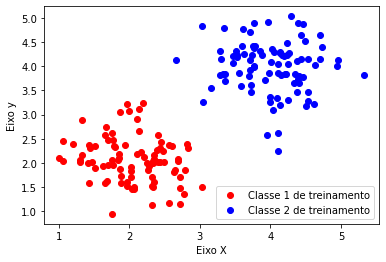

In [113]:
plt.scatter(XC1_train[:,0],XC1_train[:,1], color='red', label='Classe 1 de treinamento')
plt.scatter(XC2_train[:,0],XC2_train[:,1], color='blue', label='Classe 2 de treinamento')
plt.xlabel('Eixo X')
plt.ylabel('Eixo y')
plt.legend()

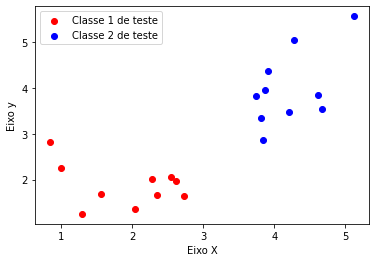

In [114]:
plt.scatter(XC1_test[:,0],XC1_test[:,1], color='red', label='Classe 1 de teste')
plt.scatter(XC2_test[:,0],XC2_test[:,1], color='blue', label='Classe 2 de teste')
plt.xlabel('Eixo X')
plt.ylabel('Eixo y')
plt.legend()

In [115]:
XC1_train[:,1]

array([1.47640565, 2.2635466 , 2.3354526 , 2.7419959 , 1.95181969,
       2.01464623, 1.58303579, 1.61542667, 2.36145862, 2.19280212,
       2.02967623, 2.04926878, 2.01463439, 3.24340892, 1.7144512 ,
       2.65620139, 3.22573948, 1.70399093, 0.94638084, 1.73217822,
       2.30006241, 1.85028146, 2.07091778, 2.30652242, 2.23856145,
       3.10817434, 2.16778954, 2.1122948 , 1.16675388, 1.49420936,
       1.99681933, 1.12877135, 2.04322594, 1.57547032, 2.07043685,
       1.81564423, 1.52213058, 2.58449867, 1.9361981 , 2.10041661,
       1.92248867, 2.46307281, 2.46762001, 3.08305777, 1.49660706,
       1.86080171, 1.50923289, 2.46931021, 1.4645768 , 2.34928274,
       1.86370656, 2.36648137, 1.8986735 , 1.51452422, 2.36000849,
       2.90346112, 1.61164279, 1.45542635, 1.87313652, 2.3423202 ,
       2.15985085, 3.05255586, 2.03798052, 1.94762807, 2.05504455,
       1.36016551, 2.02478265, 2.3960437 , 2.00616614, 1.61962478,
       2.38442122, 1.83720528, 1.99445098, 2.30968098, 2.12051

In [116]:
u1C1 = np.mean(XC1_train[:,0])
u2C1 = np.mean(XC1_train[:,1])
std1C1 = np.std(XC1_train[:,0])
std2C1 = np.std(XC1_train[:,1])

In [117]:
XC1_train.shape

(90, 2)

In [118]:
covC1 = np.cov(XC1_train[:,0],XC1_train[:,1])[0][1]
covC1

-0.04589981966931427

In [119]:
pC1 = covC1/(np.sqrt(np.square(std1C1) *np.square(std2C1)))
pC1

-0.21151422384262078

In [120]:
u1C2 = np.mean(XC2_train[:,0])
u2C2 = np.mean(XC2_train[:,1])
std1C2 = np.std(XC2_train[:,0])
std2C2 = np.std(XC2_train[:,1])
covC2 = np.cov(XC1_train[:,0],XC1_train[:,1])[0][1]
pC2 = covC1/(np.sqrt(np.square(std1C1) *np.square(std2C1)))
pC2

-0.21151422384262078

In [121]:
def funcaoProbabilidade(u1,u2,std1,std2,p,xu1, xu2):
    
    A = 1/(2*np.pi * std1*std2 * np.sqrt(1 - np.square(p)) )
    
    B = -1/(2*(1-p**2))
    C = ((xu1 - u1)/std1)**2
    D = (-2*p)*((xu1 - u1)/std1) *((xu2 - u2)/std2)
    E =  ((xu2 - u2)/std2)**2
    
    F = np.exp(B*(C + D + E))
    
    G = A * F
    
    return G

In [122]:
funcaoProbabilidade(u1C1,u2C1,std1C1,std2C1,pC1,2,2)

0.7352830788388666

In [123]:
funcaoProbabilidade(u1C2,u2C2,std1C2,std2C2,pC2,2,2)

1.1638013414153575e-09

In [124]:
PC1 = XC1_train.shape[0]/(XC1_train.shape[0] + XC2_train.shape[0])
PC2 = XC2_train.shape[0]/(XC1_train.shape[0] + XC2_train.shape[0])

PC1,PC2

(0.5, 0.5)

In [125]:
XC1_test.shape[0]

10

In [151]:
classeAproxC1 = np.zeros(10)

for i in range(XC1_test.shape[0]):
    probC1 = funcaoProbabilidade(u1C1,u2C1,std1C1,std2C1,pC1,XC1_test[i,0],XC1_test[i,1])
    probC2 = funcaoProbabilidade(u1C2,u2C2,std1C2,std2C2,pC2,XC1_test[i,0],XC1_test[i,1])
    
    K = (probC1 *PC1)/(probC2 *PC2)

    
    if (K >= 1): 
        classeAproxC1[i] = 1
    else:
        classeAproxC1[i] = 2
        

classeAproxC2 = np.zeros(10)

for i in range(XC2_test.shape[0]):
    probC1 = funcaoProbabilidade(u1C1,u2C1,std1C1,std2C1,pC1,XC2_test[i,0],XC2_test[i,1])
    probC2 = funcaoProbabilidade(u1C2,u2C2,std1C2,std2C2,pC2,XC2_test[i,0],XC2_test[i,1])
    
    K = (probC1 *PC1)/(probC2 *PC2)
    
    if (K >= 1): 
        classeAproxC2[i] = 1
    else:
        classeAproxC2[i] = 2
    

In [152]:
colorsAproxC2 = []
for i in range(XC1_test.shape[0]):
    if classeAproxC2[i] == 1:
        colorsAproxC2.append('red')
    if classeAproxC2[i] == 2:
        colorsAproxC2.append('blue')
        
        
colorsAproxC1 = []
for i in range(XC1_test.shape[0]):
    if classeAproxC1[i] == 1:
        colorsAproxC1.append('red')
    if classeAproxC1[i] == 2:
        colorsAproxC1.append('blue')

In [153]:
accuracy_score(classeAproxC1, yC1_test)

1.0

In [154]:
accuracy_score(classeAproxC2, yC2_test)

1.0

In [155]:
grid = []
for i in np.arange(1,6,0.01):
    for j in np.arange(1,6,0.01):
        grid.append(np.array((i,j)))
        

In [156]:
grid = pd.DataFrame(grid).to_numpy()
grid

array([[1.  , 1.  ],
       [1.  , 1.01],
       [1.  , 1.02],
       ...,
       [5.99, 5.97],
       [5.99, 5.98],
       [5.99, 5.99]])

In [157]:
grid.shape

(250000, 2)

In [158]:
classeAproxGrid = np.zeros(grid.shape[0])
vetorProbC1 = np.zeros(grid.shape[0])
vetorProbC2 = np.zeros(grid.shape[0])

for i in range(grid.shape[0]):
    probC1 = funcaoProbabilidade(u1C1,u2C1,std1C1,std2C1,pC1,grid[i,0],grid[i,1])
    probC2 = funcaoProbabilidade(u1C2,u2C2,std1C2,std2C2,pC2,grid[i,0],grid[i,1])
    
    vetorProbC1[i] = probC1
    vetorProbC2[i] = probC2
    
    K = (probC1 *PC1)/(probC2 *PC2)
    
    if (K >= 1): 
        classeAproxGrid[i] = 1
    else:
        classeAproxGrid[i] = 2

In [159]:
colorsTest = []
for i in range(grid.shape[0]):
    if classeAproxGrid[i] == 1:
        colorsTest.append('lightcoral')
    if classeAproxGrid[i] == 2:
        colorsTest.append('cornflowerblue')

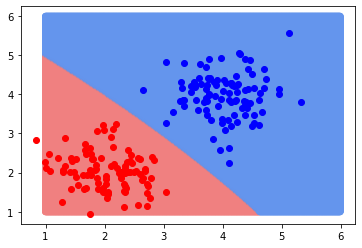

In [162]:
plt.scatter (grid[:,0],grid[:,1],color=np.array(colorsTest))
plt.scatter(XC1_train[:,0],XC1_train[:,1], color='red')
plt.scatter(XC2_train[:,0],XC2_train[:,1], color='blue')
plt.scatter(XC1_test[:,0],XC1_test[:,1], color='red')
plt.scatter(XC2_test[:,0],XC2_test[:,1], color='blue')

# Exercicio 2

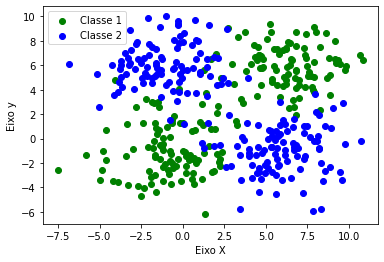

In [163]:
X1 = np.random.normal(loc=-1,scale=2, size=(100))
y1 = np.random.normal(loc=-1,scale=2,size=(100))

X2 = np.random.normal(loc=6,scale=2, size=(100))
y2 = np.random.normal(loc=-1,scale=2,size=(100))

X3 = np.random.normal(loc=6,scale=2, size=(100))
y3 = np.random.normal(loc=6,scale=2,size=(100))

X4 = np.random.normal(loc=-1,scale=2, size=(100))
y4 = np.random.normal(loc=6,scale=2,size=(100))


X1 = np.append(X1,X3)
X2 = np.append(X2,X4)

y1 = np.append(y1,y3)
y2 = np.append(y2,y4)




plt.scatter(X1,y1, color='green', label='Classe 1')
plt.scatter(X2,y2, color='blue', label='Classe 2')
plt.xlabel('Eixo X')
plt.ylabel('Eixo y')
plt.legend()

In [164]:
X = np.zeros((400,3))
X[:,0] = np.append(X1,X2)
X[:,1] = np.append(y1,y2)
f = lambda i:1 if i <200 else 2 
classe = [f(i) for i in range(400)]
X[:,2] = classe
X = pd.DataFrame(X)
X.rename(columns={0:'X1',1:'X2',2:'Classe'}, inplace=True)
X

,X1,X2,Classe
0,1.211265,1.122997,1.0
1,-1.721209,-0.238138,1.0
2,-3.282321,-3.819337,1.0
3,-1.720171,2.908971,1.0
4,-1.188257,-0.954761,1.0
...,...,...,...
395,0.270120,5.593064,2.0
396,-5.032636,2.559752,2.0
397,-4.103176,3.566879,2.0
398,-0.778347,1.529654,2.0


In [165]:
XC1_train[:,0]

array([2.71499352, 2.38697823, 1.80153876, 1.67457233, 1.76494797,
       1.30247736, 1.65452644, 1.97395893, 1.93665146, 1.86089054,
       2.35662897, 2.68394717, 2.40153342, 2.19762869, 2.32857324,
       2.14079223, 1.96965657, 2.72196669, 1.75761835, 1.88282709,
       2.43490536, 2.27220679, 1.84598738, 1.44477281, 2.47192746,
       2.14371505, 2.34430074, 1.01201074, 2.55900999, 3.03691843,
       2.34300623, 2.32821332, 2.33094181, 1.88325998, 1.75074209,
       2.6376191 , 2.32157796, 2.40247006, 2.27878535, 1.85059652,
       2.0209564 , 1.06190301, 1.77382213, 1.99185807, 2.0665582 ,
       2.78822542, 2.33817899, 1.69391051, 2.03783089, 1.51850319,
       2.65282958, 2.56559046, 1.52116304, 1.96568847, 2.60028608,
       2.10721682, 2.35728337, 2.06605553, 1.86488896, 1.78204398,
       1.33655678, 1.8763974 , 1.06795271, 1.70157933, 1.29703713,
       2.7709327 , 2.49843117, 2.81172823, 1.42234535, 1.68648708,
       1.2086038 , 2.02736828, 2.24803984, 2.83353027, 2.21091

In [166]:
Xaux = X.to_numpy()
XC1_train, XC1_test, yC1_train, yC1_test = train_test_split(Xaux[0:200,0:2],Xaux[0:200,2], test_size=0.1)
XC2_train, XC2_test, yC2_train, yC2_test = train_test_split(Xaux[200:400,0:2],Xaux[200:400,2], test_size=0.1)
u1C1 = np.mean(XC1_train[:,0])
u2C1 = np.mean(XC1_train[:,1])
std1C1 = np.std(XC1_train[:,0])
std2C1 = np.std(XC1_train[:,1])
covC1 = np.cov(XC1_train[:,0],XC1_train[:,1])[0][1]
pC1 = covC1/(np.sqrt(np.square(std1C1) *np.square(std2C1)))

u1C2 = np.mean(XC2_train[:,0])
u2C2 = np.mean(XC2_train[:,1])
std1C2 = np.std(XC2_train[:,0])
std2C2 = np.std(XC2_train[:,1])
covC2 = np.cov(XC2_train[:,0],XC2_train[:,1])[0][1]
pC2 = covC2/(np.sqrt(np.square(std1C2) *np.square(std2C2)))

PC1 = XC1_train.shape[0]/(XC1_train.shape[0] + XC2_train.shape[0])
PC2 = XC2_train.shape[0]/(XC1_train.shape[0] + XC2_train.shape[0])

PC1,PC2

(0.5, 0.5)

In [167]:
XC1_test.shape

(20, 2)

In [168]:
classeAproxC1 = np.zeros(XC1_test.shape[0])

for i in range(XC1_test.shape[0]):
    probC1 = funcaoProbabilidade(u1C1,u2C1,std1C1,std2C1,pC1,XC1_test[i,0],XC1_test[i,1])
    probC2 = funcaoProbabilidade(u1C2,u2C2,std1C2,std2C2,pC2,XC1_test[i,0],XC1_test[i,1])
    
    K = (probC1 *PC1)/(probC2 *PC2)
    
    if (K >= 1): 
        classeAproxC1[i] = 1
    else:
        classeAproxC1[i] = 2
        

classeAproxC2 = np.zeros(XC2_test.shape[0])

for i in range(XC2_test.shape[0]):
    probC1 = funcaoProbabilidade(u1C1,u2C1,std1C1,std2C1,pC1,XC2_test[i,0],XC2_test[i,1])
    probC2 = funcaoProbabilidade(u1C2,u2C2,std1C2,std2C2,pC2,XC2_test[i,0],XC2_test[i,1])
    
    K = (probC1 *PC1)/(probC2 *PC2)
    
    if (K >= 1): 
        classeAproxC2[i] = 1
    else:
        classeAproxC2[i] = 2
    

In [169]:
accuracy_score(classeAproxC1, yC1_test)

0.9

In [170]:
accuracy_score(classeAproxC2, yC2_test)

1.0

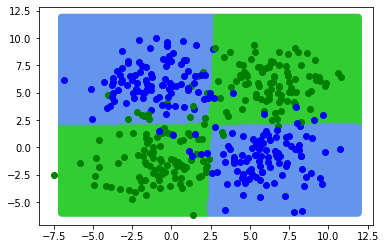

In [171]:
grid = []
for i in np.arange(-7,12,0.1):
    for j in np.arange(-6,12,0.1):
        grid.append(np.array((i,j)))

grid = pd.DataFrame(grid).to_numpy()
classeAproxGrid = np.zeros(grid.shape[0])

for i in range(grid.shape[0]):
    probC1 = funcaoProbabilidade(u1C1,u2C1,std1C1,std2C1,pC1,grid[i,0],grid[i,1])
    probC2 = funcaoProbabilidade(u1C2,u2C2,std1C2,std2C2,pC2,grid[i,0],grid[i,1])
    
    K = (probC1 *PC1)/(probC2 *PC2)
    
    if (K >= 1): 
        classeAproxGrid[i] = 1
    else:
        classeAproxGrid[i] = 2

colorsTest = []
for i in range(grid.shape[0]):
    if classeAproxGrid[i] == 1:
        colorsTest.append('limegreen')
    if classeAproxGrid[i] == 2:
        colorsTest.append('cornflowerblue')

plt.scatter (grid[:,0],grid[:,1],color=np.array(colorsTest))
plt.scatter(XC1_test[:,0],XC1_test[:,1], color='green')
plt.scatter(XC2_test[:,0],XC2_test[:,1], color='blue')
plt.scatter(XC1_train[:,0],XC1_train[:,1], color='green')
plt.scatter(XC2_train[:,0],XC2_train[:,1], color='blue')